In [ ]:
import datetime
import os
import sys

import pandas as pd

from py_kd_data_common_proj.ds_utils.ds_common_util import init_log_config, init_pandas_setting
from py_kd_data_common_proj.ds_utils.ds_date_util import format_date, delta_time, make_stat_week_day_list

### 出租车上下车信息
    measure: 
        total_amount, tip_amount, tolls_amount, fare_amount, passenger_count
    dim:
        tpep_pickup_datetime: 2020-12-01 00:07:13
        tpep_dropoff_datetime: 2020-12-01 00:18:12
        PULocationID: 138
        DOLocationID: 263

In [ ]:
taxi_activity_file_01 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-01.csv"
taxi_activity_file_02 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-02.csv"
taxi_activity_file_03 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-03.csv"
taxi_activity_file_04 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-04.csv"
taxi_activity_file_05 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-05.csv"
taxi_activity_file_06 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2021/2021-06.csv"
# taxi_activity_file_07 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-07.csv"
# taxi_activity_file_08 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-08.csv"
# taxi_activity_file_09 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-09.csv"
taxi_activity_file_10 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-10.csv"
taxi_activity_file_11 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-11.csv"
taxi_activity_file_12 = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/trip_data_2018-2021/2020/2020-12.csv"

taxi_df_12 = pd.read_csv(taxi_activity_file_12, low_memory=False)
taxi_df_11 = pd.read_csv(taxi_activity_file_11, low_memory=False)
taxi_df_10 = pd.read_csv(taxi_activity_file_10, low_memory=False)
# taxi_df_09 = pd.read_csv(taxi_activity_file_09, low_memory=False)
# taxi_df_08 = pd.read_csv(taxi_activity_file_08, low_memory=False)
# taxi_df_07 = pd.read_csv(taxi_activity_file_07, low_memory=False)
taxi_df_06 = pd.read_csv(taxi_activity_file_06, low_memory=False)
taxi_df_05 = pd.read_csv(taxi_activity_file_05, low_memory=False)
taxi_df_04 = pd.read_csv(taxi_activity_file_04, low_memory=False)
taxi_df_03 = pd.read_csv(taxi_activity_file_03, low_memory=False)
taxi_df_02 = pd.read_csv(taxi_activity_file_02, low_memory=False)
taxi_df_01 = pd.read_csv(taxi_activity_file_01, low_memory=False)

# taxi_df = pd.concat(
#     [taxi_df_01, taxi_df_02, taxi_df_03, taxi_df_04, taxi_df_05, taxi_df_06, taxi_df_07, taxi_df_08, taxi_df_09,
#      taxi_df_10, taxi_df_11,
#      taxi_df_12], axis=0)

taxi_df = pd.concat(
    [taxi_df_01, taxi_df_02, taxi_df_03, taxi_df_04, taxi_df_05, taxi_df_06,
     taxi_df_10, taxi_df_11,
     taxi_df_12], axis=0)

In [ ]:
taxi_df['pickup_date'] = taxi_df['tpep_pickup_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['dropoff_date'] = taxi_df['tpep_dropoff_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['elapse_time'] = taxi_df.apply(lambda x: str(delta_time(x['tpep_pickup_datetime'], x['tpep_dropoff_datetime'])),
                                       axis=1)

taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,dropoff_date,elapse_time
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,3.0,0.5,0.00,0.00,0.3,11.80,2.5,2021-01-01,2021-01-01,0:06:02
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,0.5,0.5,0.00,0.00,0.3,4.30,0.0,2021-01-01,2021-01-01,0:00:59
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,0.5,0.5,8.65,0.00,0.3,51.95,0.0,2021-01-01,2021-01-01,0:27:36
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,0.5,0.5,6.05,0.00,0.3,36.35,0.0,2021-01-01,2021-01-01,0:15:13
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,0.5,0.5,4.06,0.00,0.3,24.36,2.5,2021-01-01,2021-01-01,0:16:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,0.0,0.5,8.16,0.00,0.3,43.95,2.5,2020-12-31,2021-01-01,0:16:47
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,0.0,0.5,3.65,0.00,0.3,20.17,2.5,2020-12-31,2020-12-31,0:08:56
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,0.0,0.5,2.75,6.12,0.3,78.98,0.0,2020-12-31,2020-12-31,0:39:20
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,0.0,0.5,2.75,0.00,0.3,39.50,0.0,2020-12-31,2020-12-31,0:12:53


### 出租车活动区域
    dim：
        LocationID: 138

In [ ]:
taxi_zone_file = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/taxi_zone/taxi_zone_lookup.csv"

taxi_zone_df = pd.read_csv(taxi_zone_file, low_memory=False)

taxi_zone_df

,LocationID,Borough,Zone,Service_Zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### 连接出租车上下车活动信息与活动区域


In [ ]:
taxi_pickup_df = taxi_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='PULocationID',
                              lsuffix='_L',
                              rsuffix="_R")

taxi_pickup_df = taxi_pickup_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='DOLocationID',
                                     lsuffix='_PU',
                                     rsuffix="_DO")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,pickup_date,dropoff_date,elapse_time,Borough_PU,Zone_PU,Service_Zone_PU,Borough_DO,Zone_DO,Service_Zone_DO
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,2.5,2021-01-01,2021-01-01,0:06:02,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Central Park,Yellow Zone
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,0.0,2021-01-01,2021-01-01,0:00:59,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,0.0,2021-01-01,2021-01-01,0:27:36,Queens,JFK Airport,Airports,Brooklyn,Midwood,Boro Zone
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,0.0,2021-01-01,2021-01-01,0:15:13,Queens,LaGuardia Airport,Airports,Queens,JFK Airport,Airports
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,2.5,2021-01-01,2021-01-01,0:16:32,Manhattan,East Chelsea,Yellow Zone,Brooklyn,Brooklyn Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,2.5,2020-12-31,2021-01-01,0:16:47,Manhattan,Lincoln Square West,Yellow Zone,Bronx,Belmont,Boro Zone
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,2.5,2020-12-31,2020-12-31,0:08:56,Manhattan,Alphabet City,Yellow Zone,Manhattan,Yorkville East,Yellow Zone
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,0.0,2020-12-31,2020-12-31,0:39:20,Brooklyn,Sheepshead Bay,Boro Zone,Bronx,East Tremont,Boro Zone
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,0.0,2020-12-31,2020-12-31,0:12:53,Manhattan,Lower East Side,Yellow Zone,Queens,Jackson Heights,Boro Zone


### 选取第 9999 行

In [ ]:
taxi_pickup_df.iloc[9999]

VendorID                                     1
tpep_pickup_datetime       2021-01-01 13:26:43
tpep_dropoff_datetime      2021-01-01 13:31:59
passenger_count                              2
trip_distance                              0.7
RatecodeID                                   1
store_and_fwd_flag                           N
PULocationID                               262
DOLocationID                               236
payment_type                                 1
fare_amount                                5.5
extra                                      2.5
mta_tax                                    0.5
tip_amount                                1.75
tolls_amount                                 0
improvement_surcharge                      0.3
total_amount                             10.55
congestion_surcharge                       2.5
pickup_date                         2021-01-01
dropoff_date                        2021-01-01
elapse_time                            0:05:16
Borough_PU   

### 选取第 9999 行的指定列

In [ ]:
taxi_pickup_df.loc[
    9999, ['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
           'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

,pickup_date,total_amount,trip_distance,passenger_count,elapse_time,tpep_pickup_datetime,pickup_date,Zone_PU,tpep_dropoff_datetime,dropoff_date,Zone_DO
9999,2021-01-01,10.55,0.70,2.0,0:05:16,2021-01-01 13:26:43,2021-01-01,Yorkville East,2021-01-01 13:31:59,2021-01-01,Upper East Side North
9999,2021-02-02,9.80,1.10,1.0,0:05:02,2021-02-02 10:50:56,2021-02-02,Gramercy,2021-02-02 10:55:58,2021-02-02,Murray Hill
9999,2021-03-01,13.50,1.63,1.0,0:07:03,2021-03-01 09:40:20,2021-03-01,Union Sq,2021-03-01 09:47:23,2021-03-01,Times Sq/Theatre District
9999,2021-04-01,16.80,0.36,1.0,0:02:23,2021-04-01 09:37:26,2021-04-01,Midtown Center,2021-04-01 09:39:49,2021-04-01,Murray Hill
9999,2021-05-01,11.15,1.10,1.0,0:05:41,2021-05-01 09:41:14,2021-05-01,Central Park,2021-05-01 09:46:55,2021-05-01,Upper West Side South
9999,2021-06-01,13.56,1.82,1.0,0:08:42,2021-06-01 08:19:34,2021-06-01,Union Sq,2021-06-01 08:28:16,2021-06-01,Midtown East
9999,2020-10-01,32.76,5.44,1.0,0:32:23,2020-10-01 09:22:04,2020-10-01,Kips Bay,2020-10-01 09:54:27,2020-10-01,Brooklyn Heights
9999,2020-11-01,10.10,0.80,2.0,0:03:14,2020-11-01 09:28:03,2020-11-01,Flatiron,2020-11-01 09:31:17,2020-11-01,Union Sq
9999,2020-12-01,13.80,2.16,1.0,0:08:20,2020-12-01 10:11:41,2020-12-01,World Trade Center,2020-12-01 10:20:01,2020-12-01,Greenwich Village North


In [ ]:
taxi_pickup_df.loc[:,
['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
 'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

,pickup_date,total_amount,trip_distance,passenger_count,elapse_time,tpep_pickup_datetime,pickup_date,Zone_PU,tpep_dropoff_datetime,dropoff_date,Zone_DO
0,2021-01-01,11.80,2.10,1.0,0:06:02,2021-01-01 00:30:10,2021-01-01,Lincoln Square East,2021-01-01 00:36:12,2021-01-01,Central Park
1,2021-01-01,4.30,0.20,1.0,0:00:59,2021-01-01 00:51:20,2021-01-01,Upper West Side North,2021-01-01 00:52:19,2021-01-01,Manhattan Valley
2,2021-01-01,51.95,14.70,1.0,0:27:36,2021-01-01 00:43:30,2021-01-01,JFK Airport,2021-01-01 01:11:06,2021-01-01,Midwood
3,2021-01-01,36.35,10.60,0.0,0:15:13,2021-01-01 00:15:48,2021-01-01,LaGuardia Airport,2021-01-01 00:31:01,2021-01-01,JFK Airport
4,2021-01-01,24.36,4.94,1.0,0:16:32,2021-01-01 00:31:49,2021-01-01,East Chelsea,2021-01-01 00:48:21,2021-01-01,Brooklyn Heights
...,...,...,...,...,...,...,...,...,...,...,...
1461892,2020-12-31,43.95,9.22,NaN,0:16:47,2020-12-31 23:44:35,2020-12-31,Lincoln Square West,2021-01-01 00:01:22,2021-01-01,Belmont
1461893,2020-12-31,20.17,4.79,NaN,0:08:56,2020-12-31 23:41:36,2020-12-31,Alphabet City,2020-12-31 23:50:32,2020-12-31,Yorkville East
1461894,2020-12-31,78.98,28.00,NaN,0:39:20,2020-12-31 23:01:17,2020-12-31,Sheepshead Bay,2020-12-31 23:40:37,2020-12-31,East Tremont
1461895,2020-12-31,39.50,7.08,NaN,0:12:53,2020-12-31 23:31:29,2020-12-31,Lower East Side,2020-12-31 23:44:22,2020-12-31,Jackson Heights


### 日期维表
    day_start date,
    month_start date,
    quarter_start date,
    year_start date,
    month_en string,
    day_of_year int,
    week_of_year int

In [ ]:
calendar_file = "/home/james/_AllDocMap/05_Dateset/kylin_demo/data/lookup_calendar/kylin_cal.csv"

cal_df = pd.read_csv(calendar_file, low_memory=False)

cal_df
### 连接出租车上下车信息：上下车信息、区域、日期

,day_start,month_start,quater_start,year_start,month_en,day_of_year,week_of_year
0,2010-01-01,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
1,2010-01-02,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
2,2010-01-03,2010-01-01,2010-01-01,2010-01-01,Jan,3,1
3,2010-01-04,2010-01-01,2010-01-01,2010-01-01,Jan,4,1
4,2010-01-05,2010-01-01,2010-01-01,2010-01-01,Jan,5,1
...,...,...,...,...,...,...,...
4738,2022-12-27,2022-12-01,2022-10-01,2022-01-01,Dec,361,52
4739,2022-12-28,2022-12-01,2022-10-01,2022-01-01,Dec,362,52
4740,2022-12-29,2022-12-01,2022-10-01,2022-01-01,Dec,363,52
4741,2022-12-30,2022-12-01,2022-10-01,2022-01-01,Dec,364,53


In [11]:
taxi_pickup_df = taxi_pickup_df.join(cal_df.set_index('day_start'), how='left', on='pickup_date',
                                     lsuffix='_L',
                                     rsuffix="_R")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Service_Zone_PU,Borough_DO,Zone_DO,Service_Zone_DO,month_start,quater_start,year_start,month_en,day_of_year,week_of_year
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,Yellow Zone,Manhattan,Central Park,Yellow Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,Airports,Brooklyn,Midwood,Boro Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,Airports,Queens,JFK Airport,Airports,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,Yellow Zone,Brooklyn,Brooklyn Heights,Boro Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,Yellow Zone,Bronx,Belmont,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,Yellow Zone,Manhattan,Yorkville East,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,Boro Zone,Bronx,East Tremont,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,Yellow Zone,Queens,Jackson Heights,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0


In [ ]:
### 按照日期排序

In [12]:
taxi_pickup_df = taxi_pickup_df.sort_values(axis=0, by=['pickup_date'], ascending=True)

taxi_pickup_df

MemoryError: Unable to allocate 1.00 GiB for an array with shape (8, 16831198) and data type object

MemoryError: Unable to allocate 642. MiB for an array with shape (5, 16831198) and data type float64

In [13]:
daily_count_df = taxi_pickup_df.groupby(['pickup_date', 'Zone_PU'])['total_amount'].count()
daily_count_df = daily_count_df.reset_index(name='cnt')
daily_count_df

,pickup_date,Zone_PU,cnt
0,2002-12-31,NV,1
1,2003-03-26,Queensbridge/Ravenswood,1
2,2008-12-31,Central Park,1
3,2008-12-31,East Harlem South,1
4,2008-12-31,Erasmus,1
...,...,...,...
63636,2021-12-15,Gramercy,1
63637,2021-12-15,Midtown North,1
63638,2021-12-15,UN/Turtle Bay South,1
63639,2021-12-15,Union Sq,1


In [14]:
sort_by_cnt_df = daily_count_df.groupby(['Zone_PU'])['cnt'].count()
sort_by_cnt_df = sort_by_cnt_df.reset_index(name='cnt')
sort_by_cnt_df = sort_by_cnt_df.sort_values(axis=0, by=['cnt'], ascending=False)
sort_by_cnt_df

,Zone_PU,cnt
226,Sutton Place/Turtle Bay North,278
230,UN/Turtle Bay South,278
123,JFK Airport,278
157,Midtown East,278
246,West Village,277
...,...,...
173,Oakwood,14
126,Jamaica Bay,7
99,Governor's Island/Ellis Island/Liberty Island,6
196,Rikers Island,4


In [15]:
all_dims = list(daily_count_df['Zone_PU'].unique())

all_dims

['NV',
 'Queensbridge/Ravenswood',
 'Central Park',
 'East Harlem South',
 'Erasmus',
 'JFK Airport',
 'Lenox Hill West',
 'Lincoln Square West',
 'Midtown Center',
 'Midtown East',
 'Sutton Place/Turtle Bay North',
 'Union Sq',
 'Upper East Side South',
 'Upper West Side South',
 'Astoria',
 'Baisley Park',
 'Battery Park City',
 'Bloomingdale',
 'Central Harlem',
 'Chinatown',
 'Clinton East',
 'East Chelsea',
 'East Harlem North',
 'East Village',
 'Gramercy',
 'Greenwich Village South',
 'Hamilton Heights',
 'Jackson Heights',
 'Kips Bay',
 'LaGuardia Airport',
 'Lenox Hill East',
 'Lincoln Square East',
 'Little Italy/NoLiTa',
 'Midtown North',
 'Midtown South',
 'Morningside Heights',
 'Murray Hill',
 'Penn Station/Madison Sq West',
 'Prospect-Lefferts Gardens',
 'UN/Turtle Bay South',
 'Upper East Side North',
 'West Concourse',
 'West Village',
 'Yorkville East',
 'Yorkville West',
 'Financial District North',
 'Flatiron',
 'Lower East Side',
 'Allerton/Pelham Gardens',
 'Alpha

### 绘制趋势图

------------------------------------------------------------
      pickup_date        Zone_PU  cnt  cnt_zscore
134    2020-10-01  East New York   65    0.747356
374    2020-10-02  East New York   58    0.333266
607    2020-10-03  East New York   43   -0.554070
838    2020-10-04  East New York   28   -1.441406
1063   2020-10-05  East New York   75    1.338913
...           ...            ...  ...         ...
62494  2021-06-26  East New York   30   -1.323095
62729  2021-06-27  East New York   24   -1.678029
62960  2021-06-28  East New York   22   -1.796341
63189  2021-06-29  East New York   38   -0.849849
63419  2021-06-30  East New York   27   -1.500562

[273 rows x 4 columns]

------------------------------------------------------------
     pickup_date        Zone_PU  cnt  cnt_zscore
68    2020-10-02  East New York   58   -0.087976
306   2020-10-09  East New York   74    0.875125
538   2020-10-16  East New York   59   -0.027782
774   2020-10-23  East New York   70    0.634350
1012  20

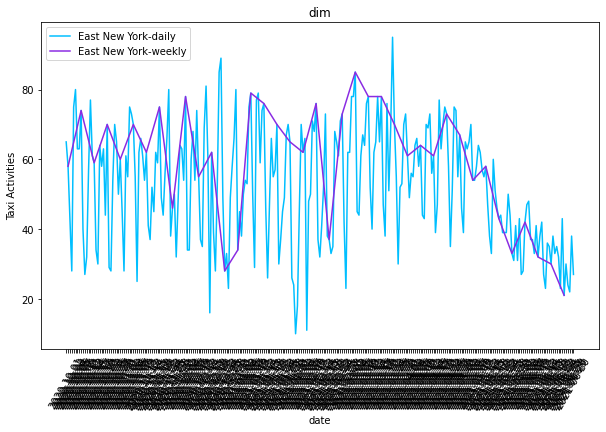

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 赋值 dataframe
data = daily_count_df

data_week = data.copy()

TITLE = 'dim'
Y_LABEL = 'Taxi Activities'
fig = plt.figure(figsize=(10, 6))

colors = ['deepskyblue', 'blueviolet', 'peru', 'brown', 'black', 'red', 'gold', 'darkorange']

DIM_DATE_NAME = 'pickup_date'
DIM_NAME = 'Zone_PU'
MES_CNT_NAME = 'cnt'

dims = all_dims
dims = ['East New York']

# 生成周同比数据
stat_week_day_str_list = make_stat_week_day_list('2021-07-30', -1, 7, 52)

if len(stat_week_day_str_list) != 0:
    data_week = data[data.pickup_date.isin(stat_week_day_str_list)]

data_week = data_week.groupby([DIM_DATE_NAME, DIM_NAME])[MES_CNT_NAME].sum()
data_week = data_week.reset_index(name='cnt')

# 绘图
i = 0
for dim in dims:
    subset = data[data.Zone_PU.isin([dim])]
    subset = subset.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore = zscore(subset[MES_CNT_NAME])
    subset['cnt_zscore'] = cnt_zscore
    print(subset)
    print('')
    plt.plot(subset[DIM_DATE_NAME], subset[MES_CNT_NAME], c=colors[i], label=f"{dim}-daily")
    i = (i + 1) % 8

    subset_week = data_week[data_week.Zone_PU.isin([dim])]
    subset_week = subset_week.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore_week = zscore(subset_week[MES_CNT_NAME])
    subset_week['cnt_zscore'] = cnt_zscore_week
    print(subset_week)
    print('')
    plt.plot(subset_week[DIM_DATE_NAME], subset_week[MES_CNT_NAME], c=colors[i], label=f"{dim}-weekly")
    i = (i + 1) % 8

plt.legend(loc='upper left')
plt.title(TITLE)
plt.ylabel(Y_LABEL)
plt.xlabel('date')
plt.xticks(rotation=60)
plt.show()